<a href="https://colab.research.google.com/github/VishalMoradia/ML-Practice/blob/main/AUC_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


df = pd.read_csv('/heart-disease.csv')


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split

X = df.drop('target', axis = 1)
y = df['target']

model = RandomForestClassifier()
mean_score = np.mean(cross_val_score(model, X, y, cv = 5))
print(f"heart disease classifier 'cross-validated' accuracy: {(mean_score) *100:.2f}%")

heart disease classifier 'cross-validated' accuracy: 83.47%


### Area under Curve (AUC)
###Receiver Operating Characteristics (ROC)

#### ROC - Compares `True Positive rate` (tpr) vs `False Positive rate` (fpr)
* True Positive - Model predicts 1 and truth is 1
* False positive - Model predicts 1 and truth is 0
* True negative - Model predicts 0 and truth is 0
* False negative - Model predicts 1 and truth is 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
from sklearn.metrics import roc_curve


model.fit(X_train, y_train)

# Make predictions with probabilities 

y_prob = model.predict_proba(X_test)

y_prob[:10]

array([[0.07, 0.93],
       [0.71, 0.29],
       [0.22, 0.78],
       [0.97, 0.03],
       [0.98, 0.02],
       [0.66, 0.34],
       [0.8 , 0.2 ],
       [0.05, 0.95],
       [1.  , 0.  ],
       [0.61, 0.39]])

In [ ]:
# Differentiating between positives and negatives

y_prob_positive = y_prob[:,1]
y_prob_positive

array([0.93, 0.29, 0.78, 0.03, 0.02, 0.34, 0.2 , 0.95, 0.  , 0.39, 0.86,
       0.56, 0.99, 0.2 , 0.78, 0.5 , 0.73, 0.56, 0.7 , 0.39, 0.37, 0.93,
       0.74, 0.74, 0.03, 0.95, 0.98, 0.96, 0.59, 0.05, 0.79, 0.98, 0.68,
       0.68, 0.  , 0.56, 0.51, 0.07, 0.85, 0.73, 0.84, 0.83, 0.9 , 0.13,
       0.85, 0.15, 0.07, 0.65, 0.97, 0.98, 0.32, 0.32, 0.  , 0.89, 0.52,
       0.75, 0.89, 0.57, 0.85, 0.77, 0.63])

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)

In [16]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06666667, 0.1       , 0.13333333, 0.13333333, 0.2       ,
       0.23333333, 0.23333333, 0.26666667, 0.33333333, 0.33333333,
       0.36666667, 0.43333333, 0.43333333, 0.46666667, 0.53333333,
       0.6       , 0.6       , 0.63333333, 0.7       , 0.76666667,
       0.8       , 0.86666667, 0.9       , 1.        ])

In [19]:
tpr

array([0.        , 0.03225806, 0.12903226, 0.19354839, 0.32258065,
       0.35483871, 0.41935484, 0.4516129 , 0.5483871 , 0.58064516,
       0.58064516, 0.61290323, 0.61290323, 0.64516129, 0.64516129,
       0.67741935, 0.70967742, 0.74193548, 0.74193548, 0.80645161,
       0.87096774, 0.87096774, 0.90322581, 0.93548387, 0.93548387,
       0.93548387, 0.96774194, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

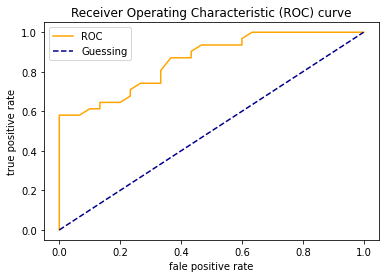

In [20]:
import matplotlib.pyplot as plt


def plot_roc(fpr, tpr):
  """
  Plots a ROC curve given the false positive rate (fpr) and true positive rate 
  (tpr) of a model
  """
  # Plot line with no predictive power (baseline)
  plt.plot(fpr, tpr, color = 'Orange', label = 'ROC')
  plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--', label = 'Guessing')
  plt.xlabel("fale positive rate")
  plt.ylabel('true positive rate')
  plt.title('Receiver Operating Characteristic (ROC) curve')
  plt.legend()
  plt.show()

plot_roc(fpr, tpr)


In [21]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_prob_positive)

0.8586021505376344